Content of Table


In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as img

In [ ]:
my_dir_path = '/content/drive/MyDrive/Data/EX05/MyPic'
my_file_list = os.listdir(my_dir_path)

print ("my_file_list: {}".format(my_file_list))

my_file_list: ['M1.JPG', 'M2.jpg', 'M3.jpg']


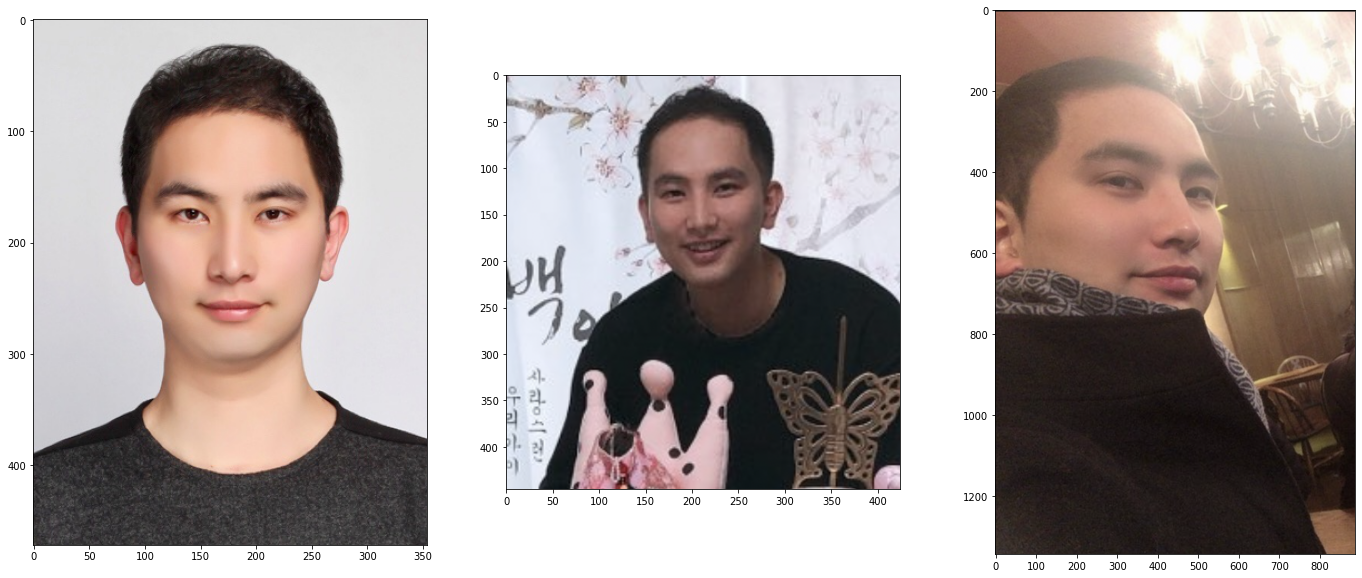

In [ ]:
#Set figsize here
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24,10))

# flatten axes for easy iterating
for i, ax in enumerate(axes.flatten()):
  image = img.imread(my_dir_path+'/'+my_file_list[i])
  ax.imshow(image)
plt.show()

fig.tight_layout()

file_list: ['하정우.jpg', '변요한.jpg', '이승기.jpg', '송강호.jpg', '황정민.jpg', '이병헌.jpg', '조승우.jpg', '임창정.jpg', '정우성.jpg', '이정재.jpg', '원빈.jpg', '이순재.jpg', '유산슬.jpg', '설운도.jpg', '박진영.jpg', '남주혁.jpg', '공유.jpg', '이동욱.jpg', '윌스미스.jpg', '윤상.jpg', '레오나르도디카프리오.jpg', '최수종.jpg', '딘딘.jpg', '조성모.jpg', '비.jpg', '이소룡.jpg', '조정석.jpg', '정해인.jpg', '김수현.jpg', '송중기.jpg', '조인성.jpg', '차태현.jpg', '김종국.jpg', '이광수.jpg', '김광규.jpg', '이서진.jpg', '현빈.jpg', '박서준.jpg', '오혁.jpg', '박보검.jpg']


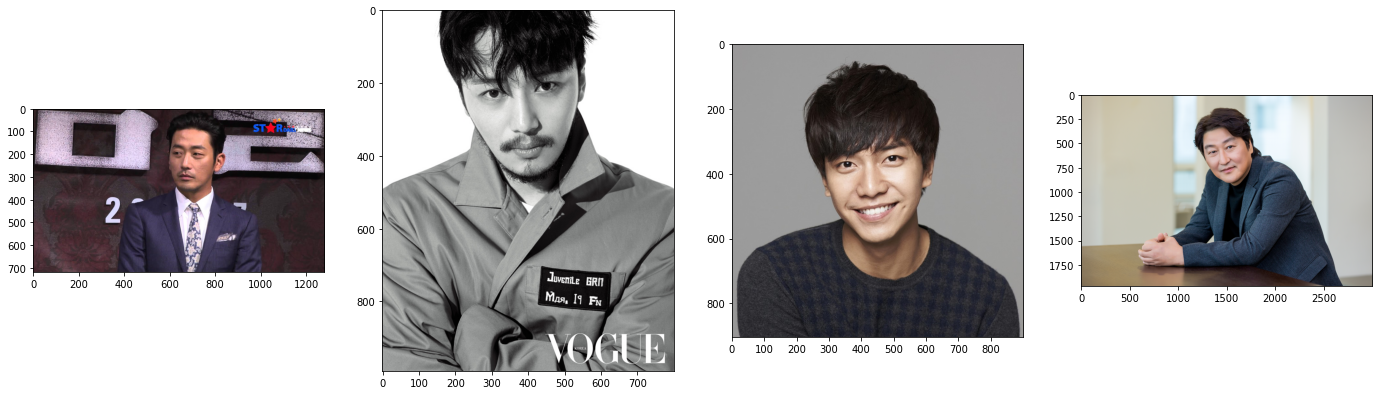

In [ ]:
# 2. 연예인 사진 확인 ( + 내사진 )

dir_path = '/content/drive/MyDrive/Data/EX05/인물사진/4.가수배우(남자)'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

import matplotlib.pyplot as plt
import matplotlib.image as img

#Set figsize here
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(24,10))

# flatten axes for easy iterating
for i, ax in enumerate(axes.flatten()):
  image = img.imread(dir_path+'/'+file_list[i])
  ax.imshow(image)
plt.show()

fig.tight_layout()

### Step2. 얼굴 영역 자르기
<hr>

임베딩 추출을 위해서는 얼굴 영역을 잘라줘야 합니다. 위 Step1.에서 찾은 이미지들을 이전에 만들었던 get_cropped_face(image_file)을 통해서 잘라줍시다! 자른 이미지는 PIL의 Image.fromarray를 통해서 PIL Image로 변환한 뒤에 저장을 해두면 다양한 재미있는 시각화를 시도해 보는 데 도움이 될 것입니다.

```
#    힌트
#    from PIL import Image
#    face = get_cropped_face(image_path)
#    pillow_image = Image.fromarray(face)
#    pillow_image.save(path_to_save)
```

In [ ]:
%%capture
!pip install face_recognition
!pip install cmake
!pip install dlib

import dlib

In [ ]:
import face_recognition
import os
from PIL import Image

# 이미지에서 얼굴 찾기
def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    if len(face_locations) == 0:  # 이미지를 못찾으면 None 리턴
        print('image_file is not found face!!:', image_file)
        return None
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]
    
    return cropped_face

In [ ]:
# 폴더내의 이미지에 대해 얼굴이미지만 별도 저장
def get_face_image(dir_path):
    path_to_save = '/content/drive/MyDrive/Data/EX05'
    file_list = os.listdir(dir_path)
    
    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_cropped_face(img_path)
        if face is None:
            continue;
        # 얼굴정보가 있으면 저장
        pillow_image = Image.fromarray(face)
        pillow_image.save(path_to_save+'/'+ file)

        
# 얼굴이미지 구하기 
dir_path = '/content/drive/MyDrive/Data/EX05/인물사진/act&my'
get_face_image(dir_path)


In [ ]:
# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)


# 폴더내의 이미지에 대해서 얼굴 임베딩 추출 및 dict 구성
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        img_path = os.path.join(dir_path, file)
        # 1. 얼굴 이미지 추출
        face = get_cropped_face(img_path)
        if face is None:
            continue;

        # 2. embedding 값 추출
        embedding = get_face_embedding(face)
        if len(embedding) > 0:  
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]
        else:
            print('embedding is null:', file)  # 3. 추출 안된 경우는 dict에 포함 안함
        
    return embedding_dict


embedding_dict = get_face_embedding_dict(dir_path)
print('embedding 된 연예인 사진 수 :', len(embedding_dict))

embedding is null: 남주혁.jpg
embedding 된 연예인 사진 수 : 44


### Step4. 모은 연예인들과 비교하기
<hr>


In [ ]:
import numpy as np

def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

# name1과 name2의 거리를 비교하는 함수를 생성하되, name1은 미리 지정하고, name2는 호출시에 인자로 받도록 합니다.
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    
    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))



In [ ]:
# M1 과 제일 닮은 이미지            
get_nearest_face('M1', 10)

순위 1 : 이름(M2), 거리(0.33345827405040507)
순위 2 : 이름(M3), 거리(0.3745266902584811)
순위 3 : 이름(송중기), 거리(0.40084768226961903)
순위 4 : 이름(박서준), 거리(0.4054292336506247)
순위 5 : 이름(조정석), 거리(0.42236168736515656)
순위 6 : 이름(M5), 거리(0.42317372081238985)
순위 7 : 이름(비), 거리(0.43447612518283013)
순위 8 : 이름(하정우), 거리(0.45000048622481054)
순위 9 : 이름(이광수), 거리(0.4563720138270924)
순위 10 : 이름(조인성), 거리(0.45878139250507793)


In [ ]:
# M2과 제일 닮은 이미지            
get_nearest_face('M2', 10)

순위 1 : 이름(M1), 거리(0.33345827405040507)
순위 2 : 이름(M3), 거리(0.40137489148923466)
순위 3 : 이름(M5), 거리(0.40207246961495957)
순위 4 : 이름(송중기), 거리(0.4524100987549092)
순위 5 : 이름(원빈), 거리(0.45450207854017105)
순위 6 : 이름(이광수), 거리(0.4565757030794978)
순위 7 : 이름(이정재), 거리(0.494019804312968)
순위 8 : 이름(조정석), 거리(0.4944385383487089)
순위 9 : 이름(하정우), 거리(0.49799603308345614)
순위 10 : 이름(박서준), 거리(0.5030248486518716)


In [ ]:
# M3과 제일 닮은 이미지            
get_nearest_face('M3', 10)

순위 1 : 이름(M1), 거리(0.3745266902584811)
순위 2 : 이름(M2), 거리(0.40137489148923466)
순위 3 : 이름(M5), 거리(0.4556036585840491)
순위 4 : 이름(이광수), 거리(0.4794348640424686)
순위 5 : 이름(하정우), 거리(0.5061029495479504)
순위 6 : 이름(M4), 거리(0.5125257705266617)
순위 7 : 이름(이정재), 거리(0.5127687624460171)
순위 8 : 이름(비), 거리(0.5149677715472522)
순위 9 : 이름(송중기), 거리(0.5197436822567956)
순위 10 : 이름(원빈), 거리(0.522289796502242)


In [ ]:
# M4과 제일 닮은 이미지            
get_nearest_face('M4', 10)

순위 1 : 이름(M5), 거리(0.4593190672783474)
순위 2 : 이름(M3), 거리(0.5125257705266617)
순위 3 : 이름(M1), 거리(0.5132183915703837)
순위 4 : 이름(M2), 거리(0.542013636080195)
순위 5 : 이름(박보검), 거리(0.5560695607123182)
순위 6 : 이름(조성모), 거리(0.5591049025885355)
순위 7 : 이름(원빈), 거리(0.5660740256732676)
순위 8 : 이름(이동욱), 거리(0.5687711398833377)
순위 9 : 이름(딘딘), 거리(0.5739746551401844)
순위 10 : 이름(최수종), 거리(0.5792705881680147)


In [ ]:
# M5과 제일 닮은 이미지            
get_nearest_face('M5', 10)

순위 1 : 이름(M2), 거리(0.40207246961495957)
순위 2 : 이름(M1), 거리(0.42317372081238985)
순위 3 : 이름(원빈), 거리(0.43742487047298895)
순위 4 : 이름(M3), 거리(0.4556036585840491)
순위 5 : 이름(M4), 거리(0.4593190672783474)
순위 6 : 이름(이광수), 거리(0.501744162718954)
순위 7 : 이름(조정석), 거리(0.502895216716559)
순위 8 : 이름(박보검), 거리(0.5199299789531702)
순위 9 : 이름(조인성), 거리(0.527170088231733)
순위 10 : 이름(이서진), 거리(0.5313304329984271)


### Step5. 다양한 재미있는 시각화 시도해 보기
<hr>